### Importando libs

In [6]:
# Atividade:
# • Utilizando a base de imagens folhas disponibilizada no sigaa:
# 1. Aplique o algoritmo K-means utilizando os pixels como pesos, após isso utilize algum detector de borda;
# 2. Aplique o limiar de Otsu, após isso utilize o mesmo detector de borda do item anterior;
# 3. Discuta os resultados.

In [110]:
from skimage.io import imread, imsave, imread_collection
from sklearn.cluster import KMeans
from skimage.color import rgb2gray
from skimage import data
import matplotlib.pyplot as plt
import numpy as np
import joblib
from skimage.filters import laplace, sobel, threshold_otsu

### Importado imagens

In [8]:
arqs = imread_collection('folhas/*') 

In [9]:
arqs.files

['folhas/bg1.tif',
 'folhas/bg2.tif',
 'folhas/bg3.tif',
 'folhas/bg4.tif',
 'folhas/bg5.tif',
 'folhas/bg6.tif',
 'folhas/bg7.tif',
 'folhas/bg8.tif',
 'folhas/bg9.tif',
 'folhas/bg10.tif']

### Elbow - Verificando valores de K (Quantidade de clusters)

In [125]:
def elbow(img):
    SSD = []
    Klength = range(1, 10)
    for k in  Klength:
        km = KMeans(n_clusters = k).fit(img)
        SSD.append(km.inertia_)
        
    plt.figure(figsize = (15, 5))
    plt.plot(Klength, SSD, 'bo-')
    plt.ylabel('Soma das distâncias quadradas')
    plt.xlabel('k clusters')
    plt.title('Elbow')
    plt.show()

### Função para plotagem das imagens

In [161]:
def varios_plot(img, k, borda = 'off', otsu = 'off'):
    if   k == 0: plt.imshow(img, 'gray')
    elif k == 1: plt.imshow(img == 0, 'gray')
    else:
        fig, ax = plt.subplots(1, k, figsize = (15, 20))
        for x in range(k):
            if borda == 'borda' and otsu == 'off':    #Sobel
                ax[x].imshow(sobel((img == x)), 'gray')
            elif borda == 'borda' and otsu == 'otsu': #Sobel -> Otsu -> Sobel
                image = sobel((img == x))
                ax[x].imshow(sobel(image <= threshold_otsu(image)), 'gray')
            else:
                ax[x].imshow(img == x, 'gray')  #Somente clusters
                
def plot(imagens, k = 0):

    if len(imagens) == 1:
        varios_plot(imagens[0], k)
    else:
        if k == 0:
            fig, ax = plt.subplots(1, len(imagens), figsize = (15, 20))
            for line, x in enumerate(imagens):
                ax[line].imshow(x, 'gray')
        else:
            for line, x in enumerate(imagens):
                varios_plot(x, k)
    plt.show()
        

### Plotando todos as imagens

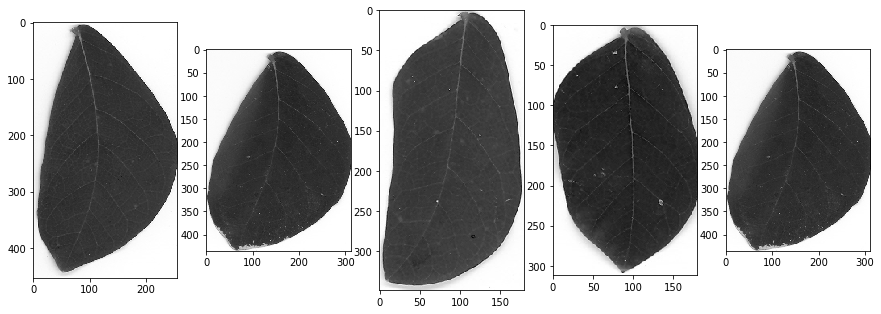

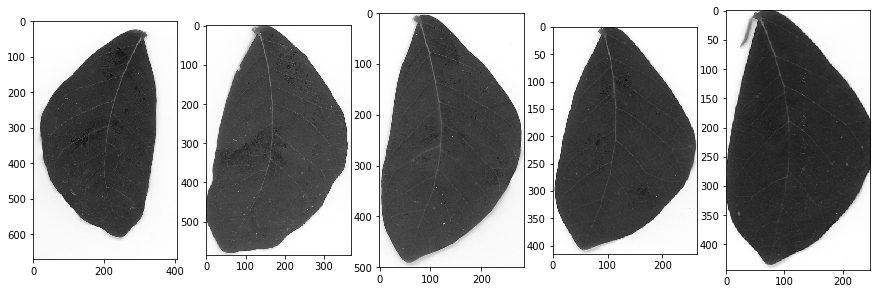

In [162]:
meio = len(arqs) // 2
plot(arqs[meio:])
plot(arqs[:meio])

### Função K-means para montar os clusters

In [198]:
def make_2dkmeans(img, k):
    return KMeans(n_clusters = k, init='k-means++').fit(img.reshape((-1,1))).labels_.reshape(img.shape)

### Escolhendo valor de K

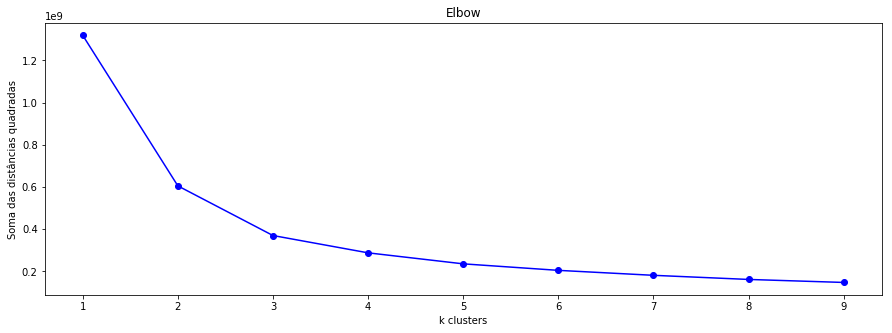

In [199]:
elbow(arqs[0])

### Aplicando Kmeans

In [205]:
k = 4
imgs = joblib.Parallel(n_jobs = -1)(
    joblib.delayed(make_2dkmeans)(x, k) for x in arqs
)

### Plotando imagens com todos os clusters

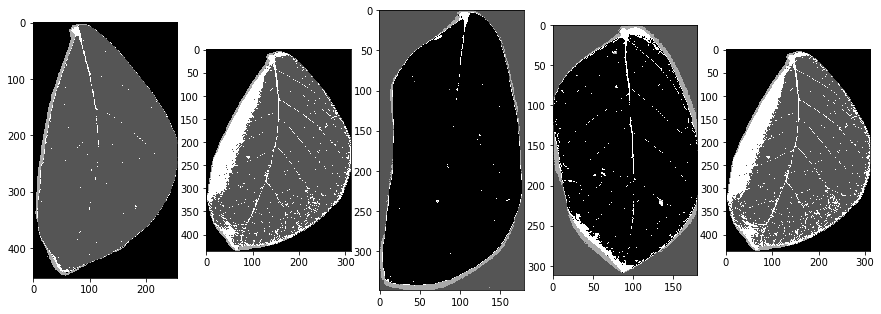

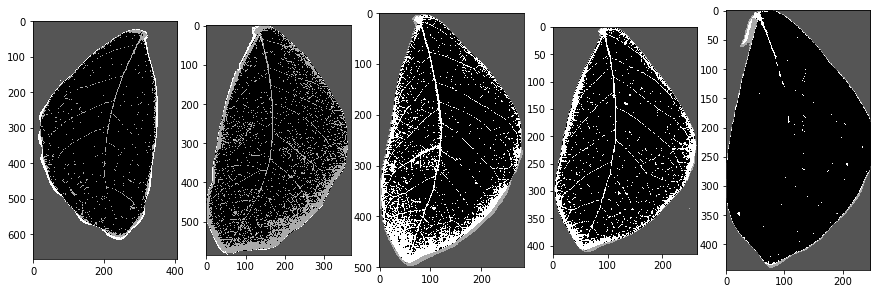

In [206]:
plot(imgs[meio:])
plot(imgs[:meio])

###  Plotanto os clusters de cada imagem

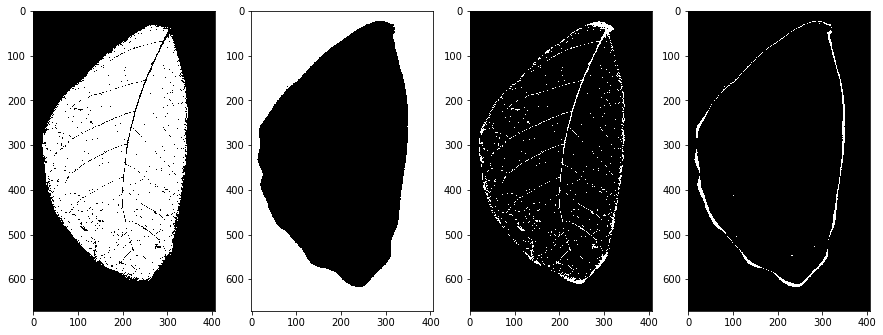

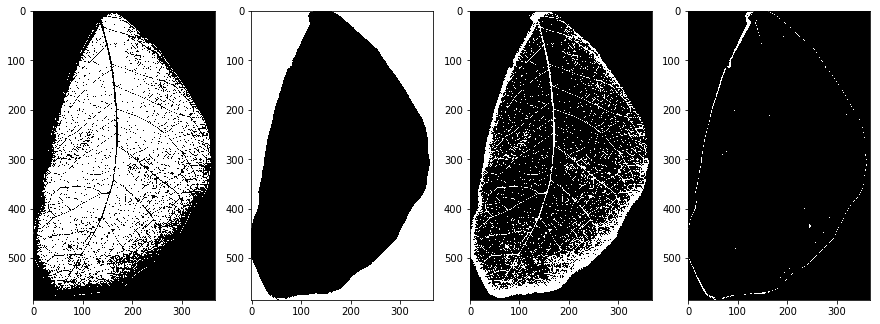

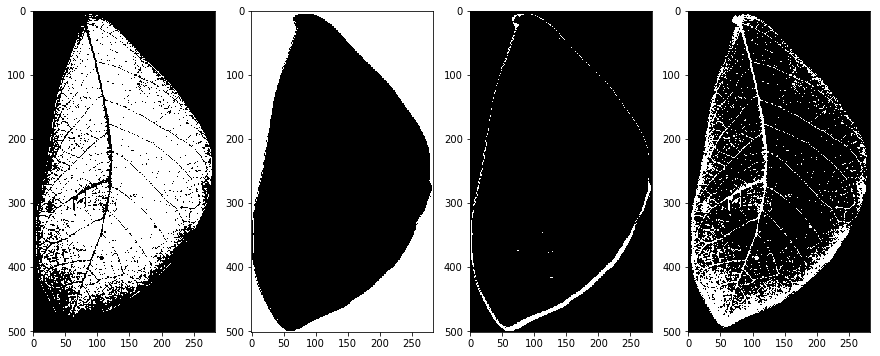

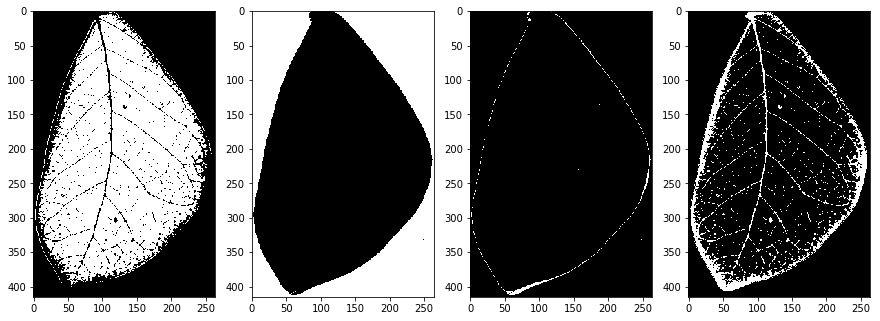

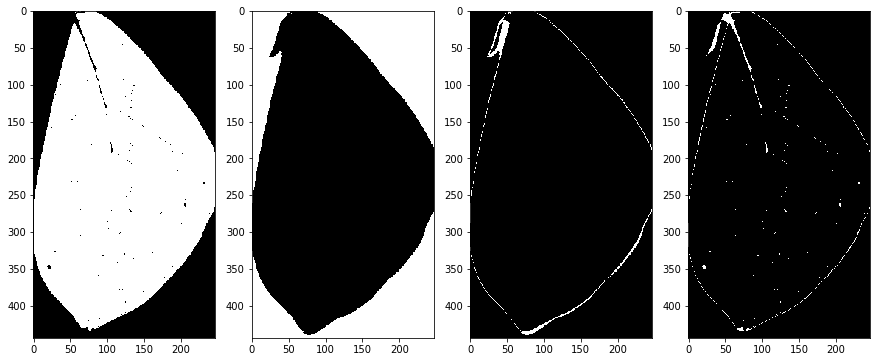

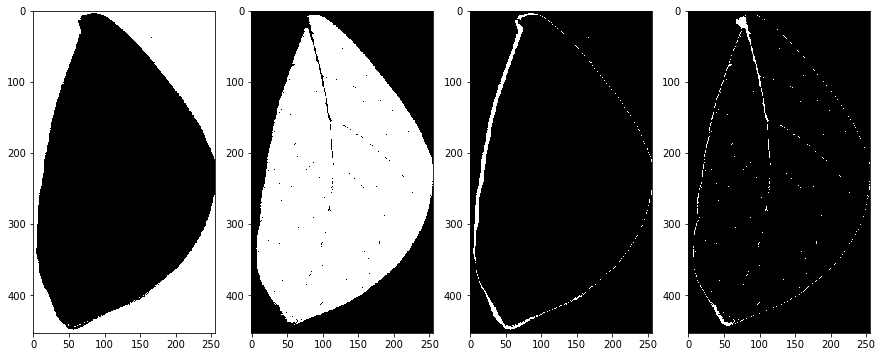

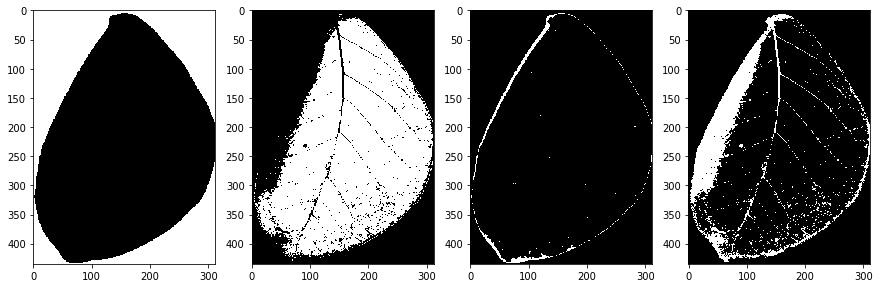

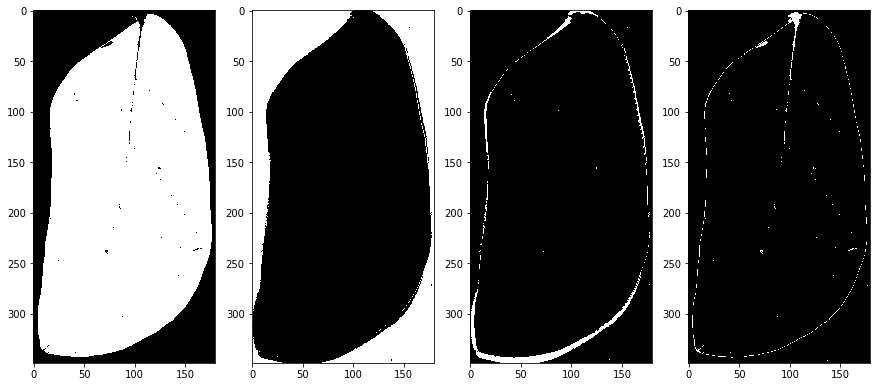

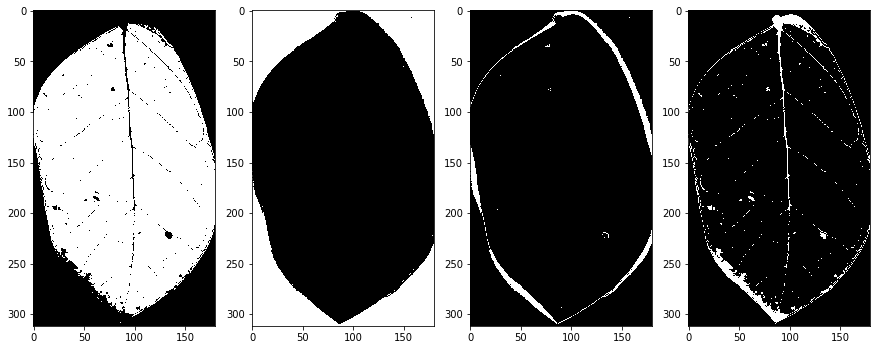

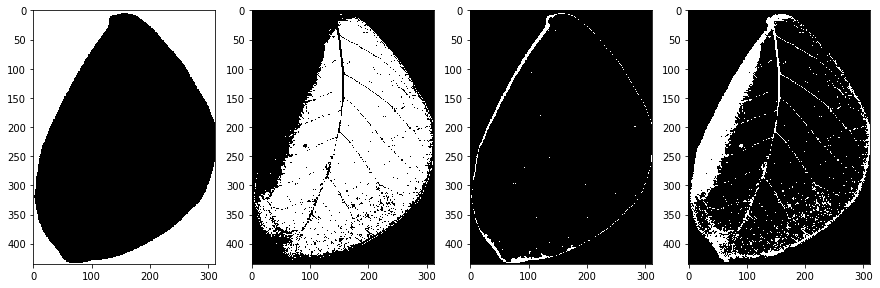

In [207]:
plot(imgs, k)

### Plotando os clusters com Detecção de Borda  (A função recebe o parâmetro 'on' para ativar o filtro Sobel )

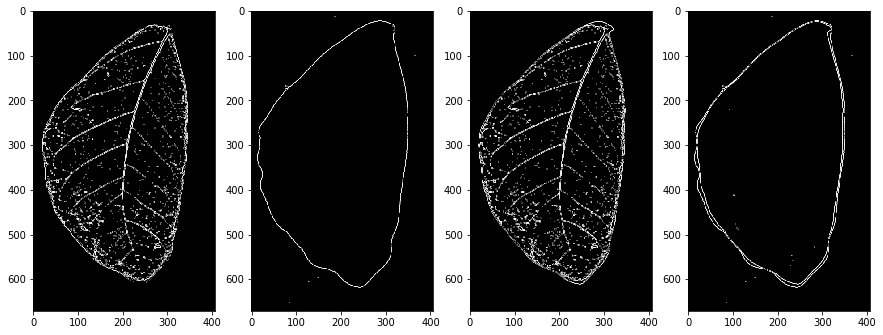

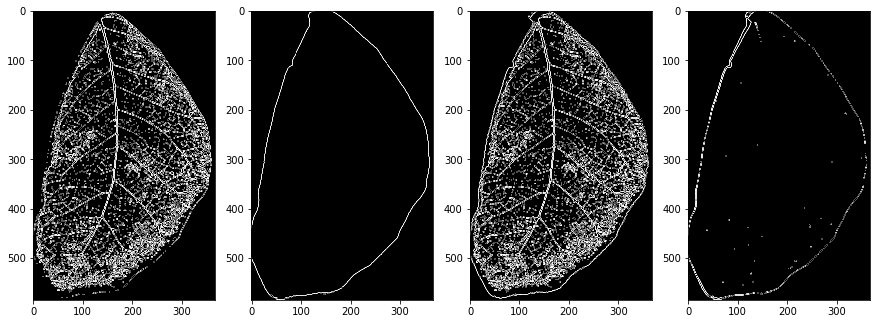

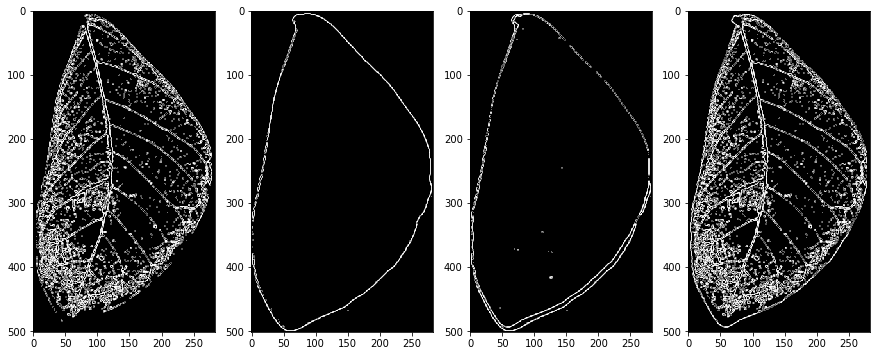

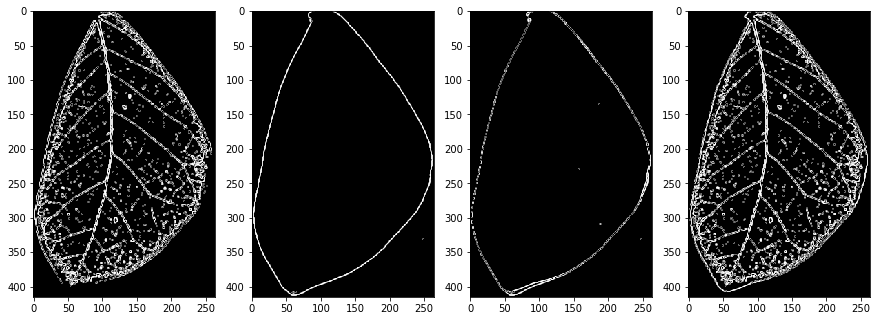

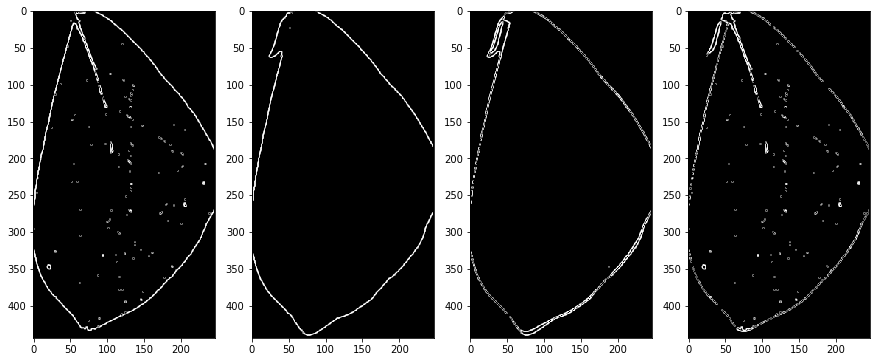

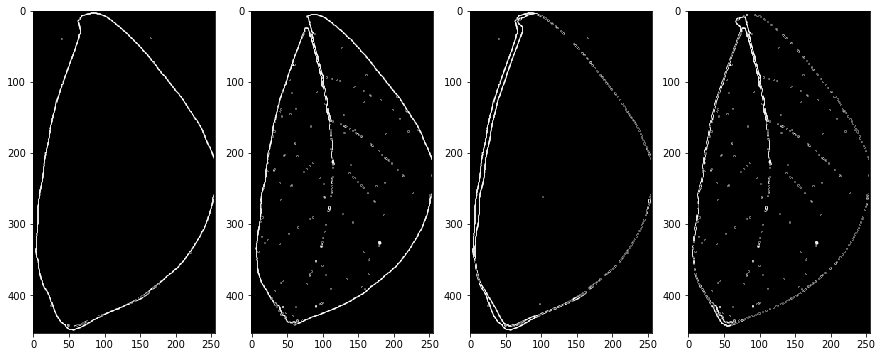

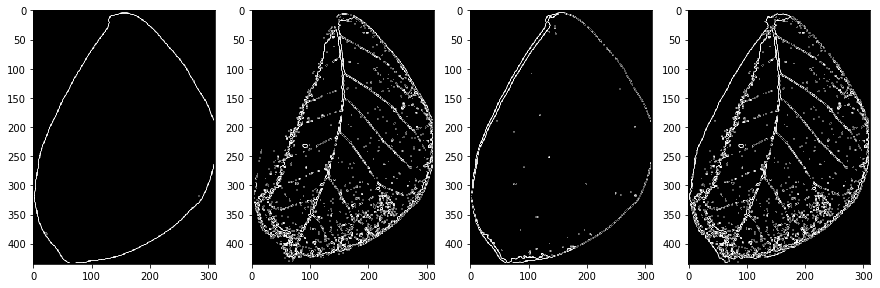

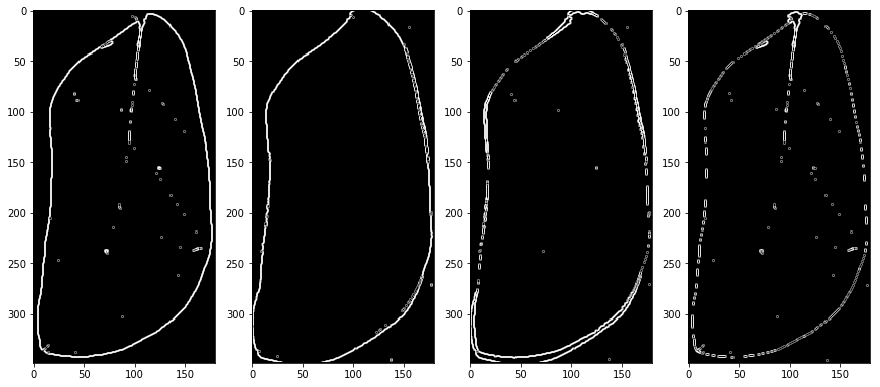

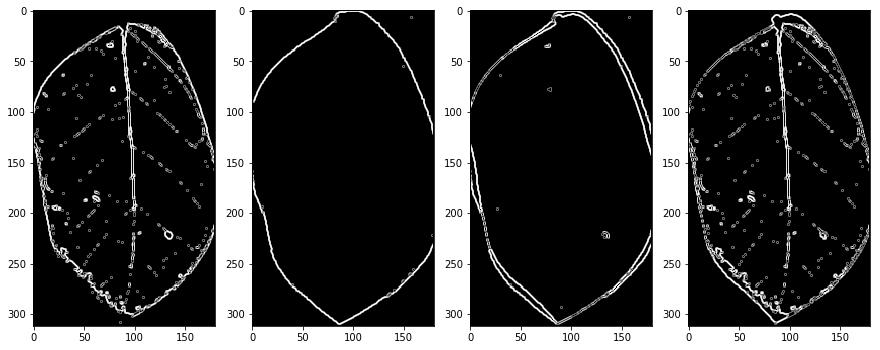

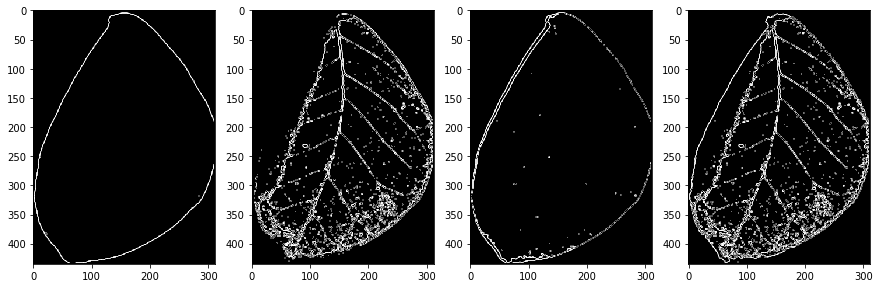

In [208]:
for x in imgs:
    varios_plot(x, k,'borda')

###  Plotanto Dectecção de Borda + Limiar de Otsu +  Dectecção de Borda | Binarização

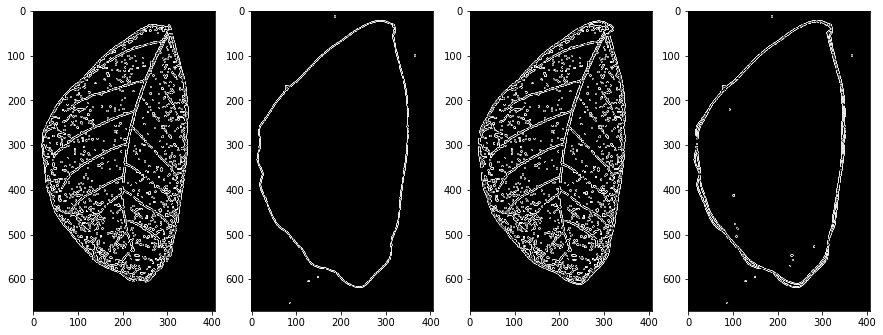

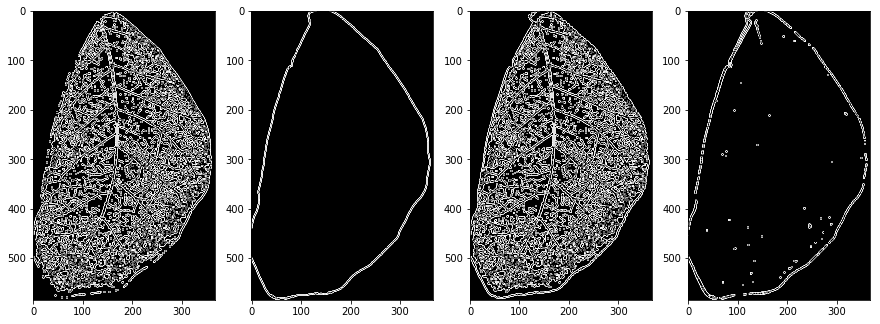

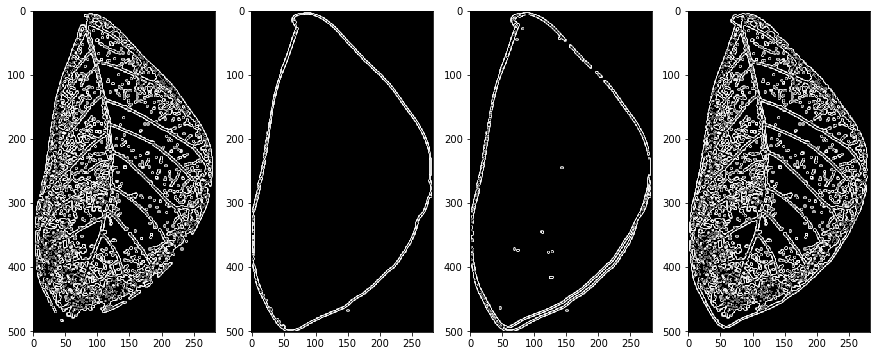

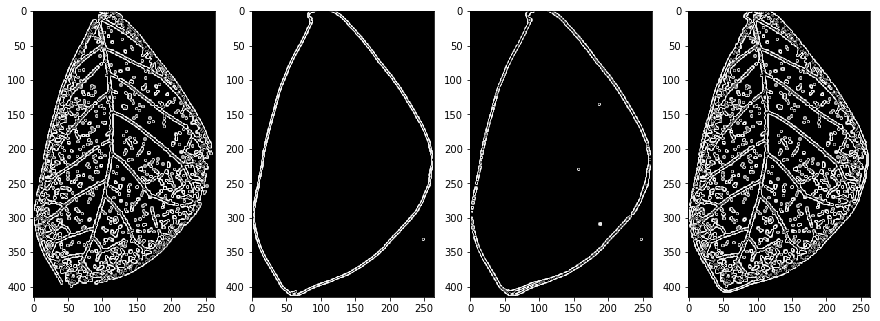

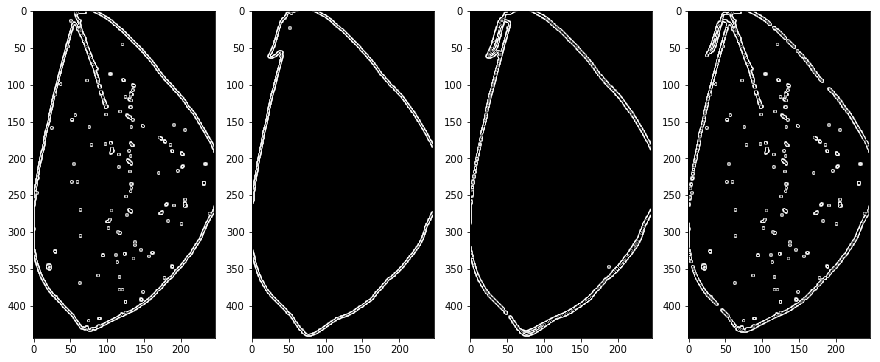

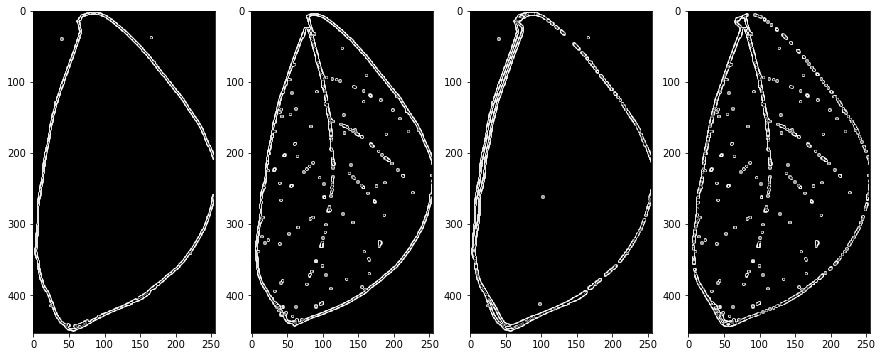

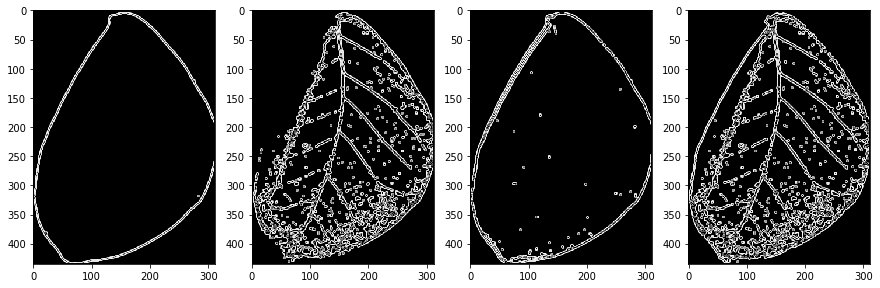

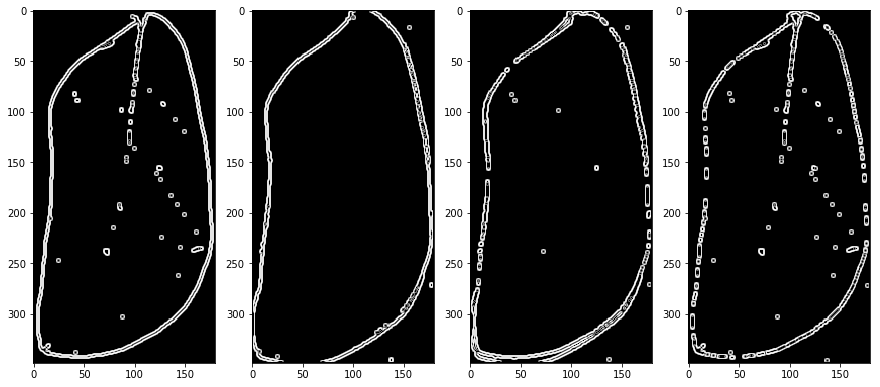

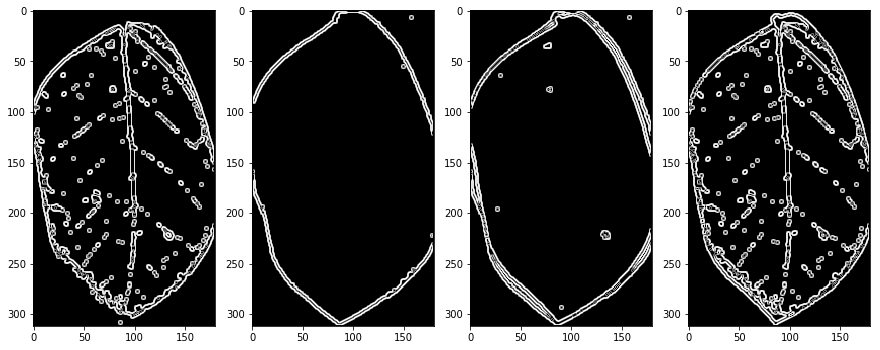

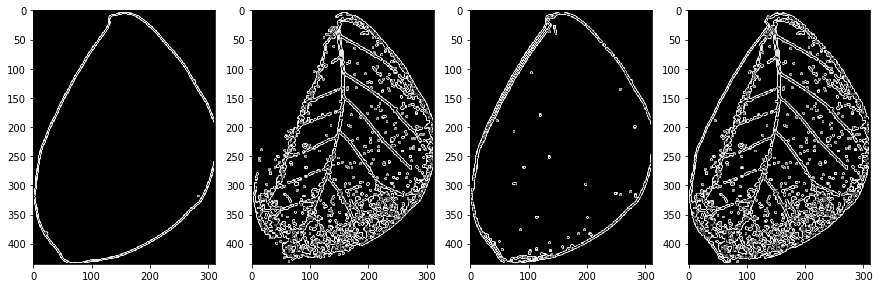

In [209]:
for x in imgs:
    varios_plot(x, k,'borda', 'otsu')

Utilizando o algoritmo K-means é possível segmentar as imagens separando os principais objetos de imagem em K grupos distintos, assim já revelado alguns detalhes a mais nas imagens. Após aplicar o filtro Sobel para a detecção de bordas ficou fácil de observar os contornos mais externos e internos da imagem com mais facilidade, já utilizando do último recurso, o limiar de Otsu (que foi aplicado da seguinte maneiras, Sobel > Threshhold_otsu > Sobel), melhorou a visualização de pequenas anomalias como pontos e traços, internas e externas nas bordas das folhas. 

O processo de Sobel + Threshhold_otsu + Sobel mostrou-se bastante vantajoso nessa aplicação em folhas, pois nos proporcionou um nível de detalhes mais apurado. 

